In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

C:\Users\Varun\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train=pd.read_csv('trainr.csv')
test=pd.read_csv('testr.csv')

In [4]:
train.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
train['max_floor'].unique()

array([  nan,   17.,    5.,   22.,   16.,    9.,    8.,    0.,   24.,
          1.,    6.,   10.,   25.,   14.,   12.,   18.,   23.,   20.,
          7.,    4.,   30.,   11.,    3.,   40.,    2.,   32.,   15.,
         27.,   21.,   19.,   28.,   29.,   13.,   39.,   38.,   31.,
         26.,   37.,   33.,   47.,   36.,   34.,   48.,   42.,   45.,
         99.,   57.,   44.,  117.,   41.])

In [6]:
X_train=train.drop(['id','timestamp','price_doc'],axis=1)
y_train=train['price_doc']
X_test=test.drop(['id','timestamp'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [8]:
lab=LabelEncoder()

In [9]:
X_train['full_sq']=lab.fit_transform(X_train['full_sq'])

In [10]:
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(X_train[c]) 
        X_train[c] = lbl.transform(X_train[c])

In [11]:
X_train['sub_area'].values

array([  9,  70, 129, ..., 103,  77,  75], dtype=int64)

In [12]:
for c in X_test.columns:
    if X_test[c].dtype == 'object':
        lbl.fit(list(X_test[c].values)) 
        X_test[c] = lbl.transform(list(X_test[c].values))

In [13]:
X_test['sub_area'].values

array([ 38, 102,  84, ..., 133,  79,  19], dtype=int64)

In [18]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

In [19]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'logloss',
    'silent': 1}

In [40]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000,
    verbose_eval=50)

[0]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[50]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[100]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[150]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[200]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[250]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[300]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[350]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[400]	train-logloss:-2.62416e+08+500795	test-logloss:-2.62422e+08+1.00969e+06
[450]	train-logloss:-2.62416e+08+500795	test-logloss:-2.62422e+08+1.00969e+06
[500]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[550]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1.00969e+06
[600]	train-logloss:-2.62422e+08+504842	test-logloss:-2.62422e+08+1

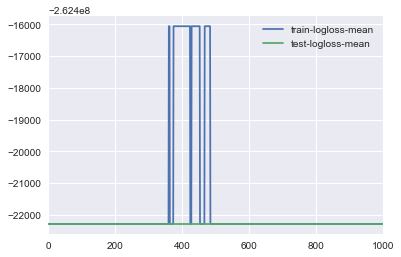

In [41]:
cv_output[['train-logloss-mean', 'test-logloss-mean']].plot()

In [42]:
cv_output.head(20)

,test-logloss-mean,test-logloss-std,train-logloss-mean,train-logloss-std
0,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
1,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
2,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
3,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
4,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
5,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
6,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
7,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
8,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266
9,-2.624223e+08,1.009688e+06,-2.624223e+08,504842.296266


In [43]:
model = xgb.train(xgb_params, dtrain, num_boost_round= 1000)

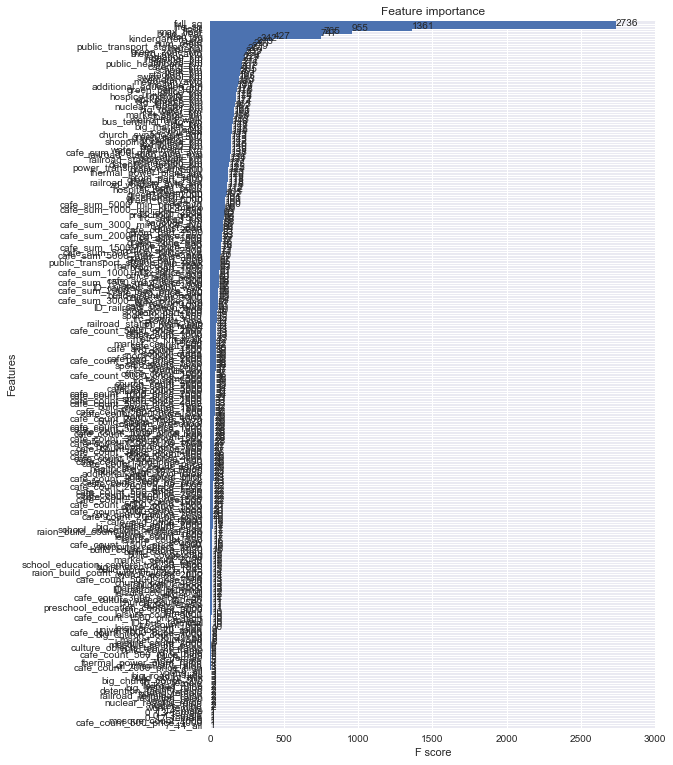

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, height=4, ax=ax)

In [47]:
y_predict = model.predict(dtest)

In [48]:
output = pd.DataFrame({'id': test['id'], 'price_doc': y_predict})

,id,price_doc
0,30474,2057077.75
1,30475,3349388.50
2,30476,2517612.50
3,30477,2441723.50
4,30478,2121550.00


In [49]:
output.head()


,id,price_doc
0,30474,5630133.5
1,30475,9000332.0
2,30476,5677159.5
3,30477,6452604.0
4,30478,5574495.5


In [50]:
output.to_csv('xgbSub.csv', index=False)

In [54]:
train.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     